Here deterministic strategies: Random, RandomInTree (by Vlad), RandomOuter, RandomInner
For ω_n (I ... I)_m define n == m for, where n is [2, 20]

# Import the dependencies

In [1]:
import sys
from tqdm import tqdm

sys.path.append("../")
from calculus_path_mod.term_engine import *
from calculus_path_mod.reduction_strategy import *

Lambda = Abstraction
App = Application

# Defining test term:
    ω_n (I ... I)_m

In [2]:
def i_term():
    x = Var()
    x_ = Atom(x)
    return Lambda(x, x_)


def omega_term(n: int):
    x = Var()
    x_ = Atom(x)
    body_app_term = x_
    for _ in range(n - 1):
        body_app_term = App(body_app_term, x_)
    return Lambda(x, body_app_term)


def multi_i_term(m: int):
    app_term = i_term()
    for _ in range(m - 1):
        app_term = App(app_term, i_term())
    return app_term


def omega_multi_i_term(n: int, m: int):
    return App(omega_term(n), multi_i_term(m))

# Drawing stuff

In [3]:
import matplotlib.pyplot as plt


def draw_mult_lines(
    comp_data: dict, title="title", x_label="x_label", y_label="y_label"
):
    for key in comp_data.keys():
        plt.plot(
            range(2, len(comp_data[key][0]) + 2), comp_data[key][0], comp_data[key][1], label=key
        )

    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)
    plt.legend(loc="upper right")
    plt.show()

# Run through strategies
## Random

In [4]:
nm_pairs = [(x, x) for x in range(2, 20+2)]

In [5]:
random_steps = []
strategy = RandomStrategy()
count_tries = 20
for n, m in tqdm(nm_pairs):
    total_steps = 0
    term = omega_multi_i_term(n, m)
    for _ in range(count_tries):
        _, norm_steps = term.normalize(strategy, is_limited=False)
        total_steps += norm_steps
    random_steps.append(total_steps / count_tries)

100%|██████████| 20/20 [06:34<00:00, 19.73s/it]


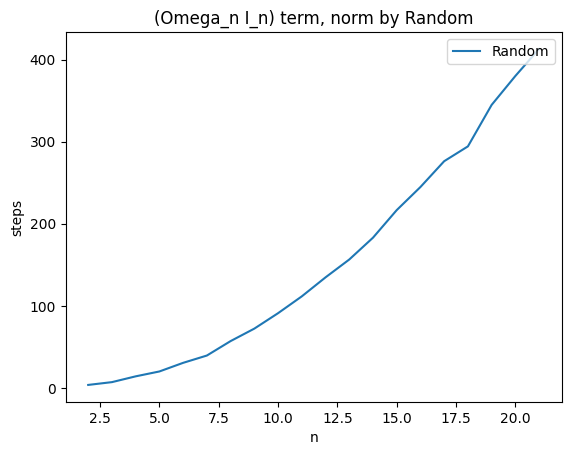

In [6]:
context = {
    "Random": (random_steps, "-"),
}

draw_mult_lines(comp_data=context, title="(Omega_n I_n) term, norm by Random", x_label="n", y_label="steps")

## RandomInTree (by Vlad)

In [7]:
random_in_tree_steps = []
strategy = RandomInTreeStrategy()
count_tries = 20
for n, m in tqdm(nm_pairs):
    total_steps = 0
    term = omega_multi_i_term(n, m)
    for _ in range(count_tries):
        _, norm_steps = term.normalize(strategy, is_limited=False)
        total_steps += norm_steps
    random_in_tree_steps.append(total_steps / count_tries)

100%|██████████| 20/20 [04:49<00:00, 14.49s/it]


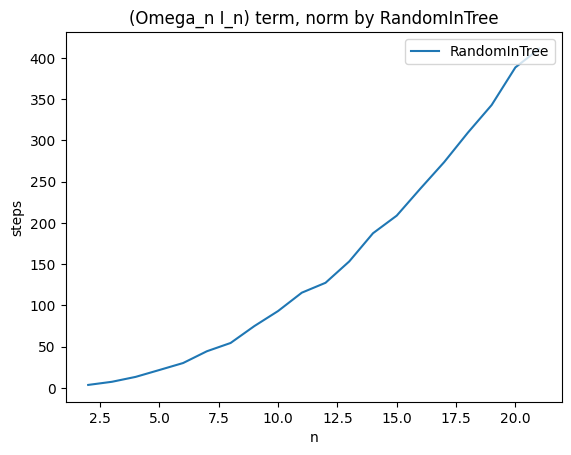

In [8]:
context = {
    "RandomInTree": (random_in_tree_steps, "-"),
}

draw_mult_lines(comp_data=context, title="(Omega_n I_n) term, norm by RandomInTree", x_label="n", y_label="steps")

## RandomOuter

In [8]:
random_outer_steps = []
strategy = RandomOuterStrategy()
count_tries = 20
for n, m in tqdm(nm_pairs):
    total_steps = 0
    term = omega_multi_i_term(n, m)
    for _ in range(count_tries):
        _, norm_steps = term.normalize(strategy, is_limited=False)
        total_steps += norm_steps
    random_outer_steps.append(total_steps / count_tries)

100%|██████████| 20/20 [08:42<00:00, 26.10s/it]


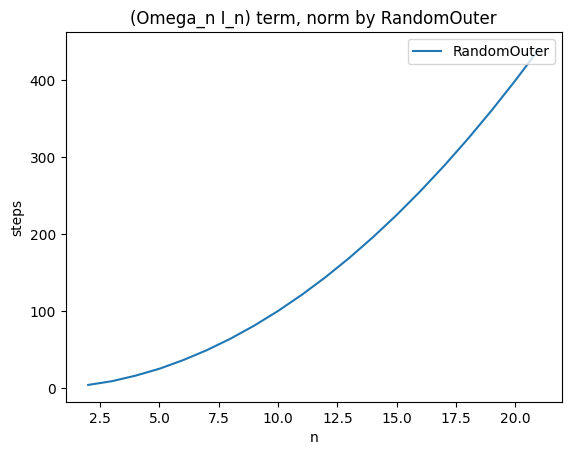

In [9]:
context = {
    "RandomOuter": (random_outer_steps, "-"),
}

draw_mult_lines(comp_data=context, title="(Omega_n I_n) term, norm by RandomOuter", x_label="n", y_label="steps")

## RandomInner

In [10]:
random_inner_steps = []
strategy = RandomInnerStrategy()
count_tries = 20
for n, m in tqdm(nm_pairs):
    total_steps = 0
    term = omega_multi_i_term(n, m)
    for _ in range(count_tries):
        _, norm_steps = term.normalize(strategy, is_limited=False)
        total_steps += norm_steps
    random_inner_steps.append(total_steps / count_tries)

100%|██████████| 20/20 [00:05<00:00,  3.97it/s]


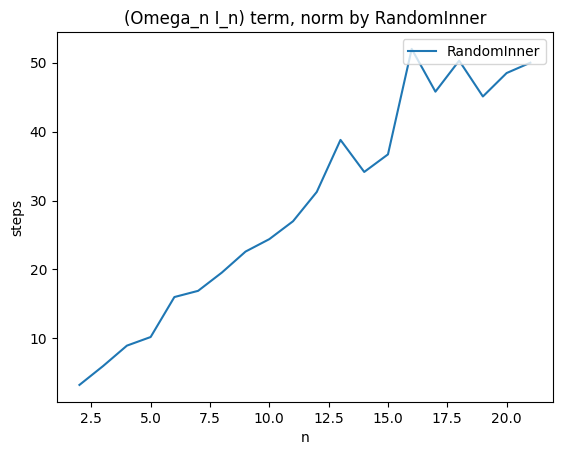

In [11]:
context = {
    "RandomInner": (random_inner_steps, "-"),
}

draw_mult_lines(comp_data=context, title="(Omega_n I_n) term, norm by RandomInner", x_label="n", y_label="steps")

# Plot graphics comparisons

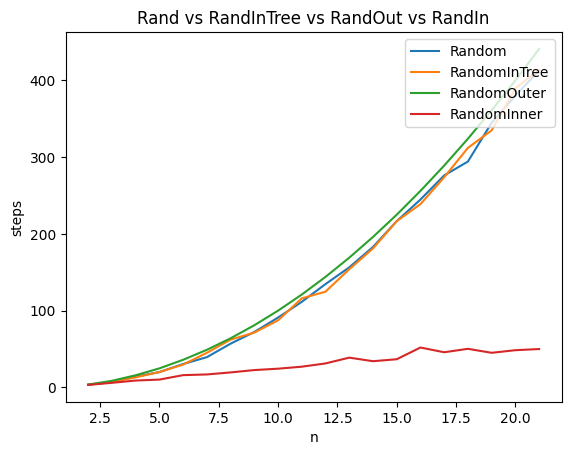

In [12]:
context = {
    "Random": (random_steps, "-"),
    "RandomInTree": (random_in_tree_steps, "-"),
    "RandomOuter": (random_outer_steps, "-"),
    "RandomInner": (random_inner_steps, "-"),
}

draw_mult_lines(comp_data=context, title="Rand vs RandInTree vs RandOut vs RandIn", x_label="n", y_label="steps")

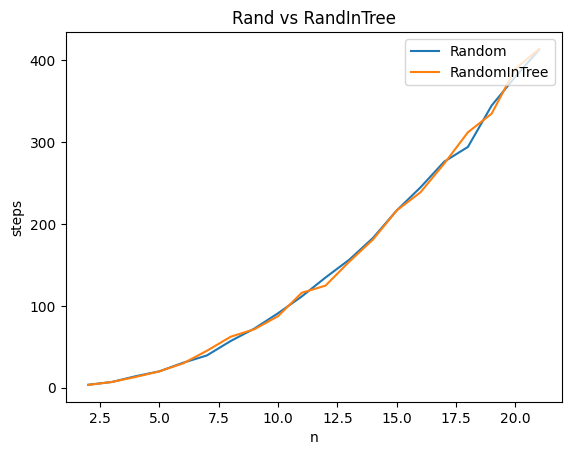

In [13]:
context = {
    "Random": (random_steps, "-"),
    "RandomInTree": (random_in_tree_steps, "-"),
}

draw_mult_lines(comp_data=context, title="Rand vs RandInTree", x_label="n", y_label="steps")

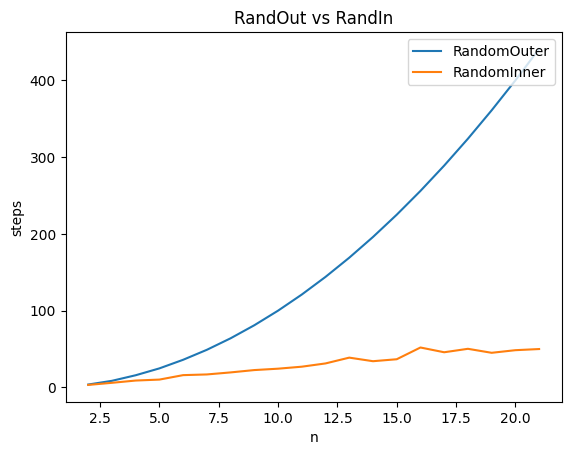

In [14]:
context = {
    "RandomOuter": (random_outer_steps, "-"),
    "RandomInner": (random_inner_steps, "-"),
}

draw_mult_lines(comp_data=context, title="RandOut vs RandIn", x_label="n", y_label="steps")

# Print steps (for using in other comparisons)

In [15]:
print(random_steps)

[3.6, 7.0, 14.05, 20.0, 30.5, 39.4, 57.0, 72.2, 91.0, 111.5, 134.65, 156.4, 183.0, 216.6, 244.75, 276.2, 294.25, 344.8, 380.05, 413.0]


In [16]:
print(random_in_tree_steps)

[3.4, 7.0, 13.15, 20.0, 29.75, 45.1, 62.25, 71.4, 87.4, 116.0, 124.75, 154.0, 181.05, 216.6, 238.75, 273.8, 312.1, 334.9, 389.55, 414.0]


In [17]:
print(random_outer_steps)

[3.75, 8.6, 15.85, 24.8, 36.0, 49.0, 64.0, 81.0, 100.0, 121.0, 144.0, 169.0, 196.0, 225.0, 256.0, 289.0, 324.0, 361.0, 400.0, 441.0]


In [18]:
print(random_inner_steps)

[3.25, 6.0, 8.95, 10.2, 16.0, 16.9, 19.55, 22.6, 24.4, 27.0, 31.25, 38.8, 34.15, 36.7, 52.0, 45.8, 50.3, 45.1, 48.5, 50.0]
